In [1]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib

In [2]:
# Choose some values for the parameters n and p
p = 0.7
n = 1000

# Generate random picks. Note that this is as if we generated Bernoulli trials 
#   as above, but then just counted the successes in each "experiment"
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom

# Print out the results
print(f'{num_successes} successes out of {n} trials, simulated p = {p:.4f}, empirical p = {num_successes/n:.4f}')

710 successes out of 1000 trials, simulated p = 0.7000, empirical p = 0.7100


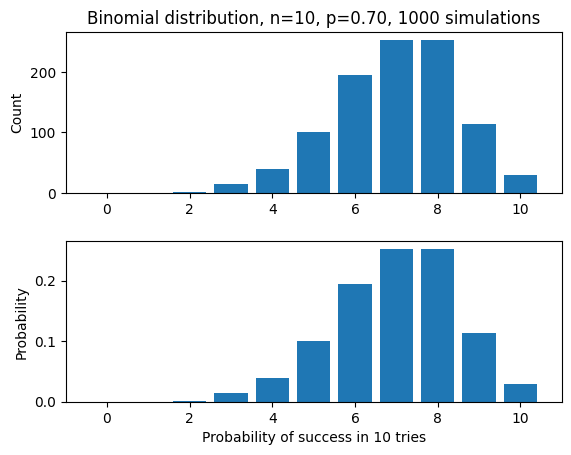

In [3]:
# The full probability distribution describes the probabilty of obtaining each 
#   possible number of successes (k), given n and p. If we set n=10, the the 
#   possible values of k are 0, 1, ..., 10. Now we use binom.rvs to simulate 
#   many different picks to get a full distribution
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Show a bar plot (histogram) of all of the possible outcomes
counts = collections.Counter(outcomes)
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n+1])
plt.title(f'Binomial distribution, n={n}, p={p:.2f}, {num_experiments} simulations')
plt.ylabel('Count')

# Show a normalized version that is a pdf. Here counts (the x-axis of the histogram) 
#   is a DISCRETE variable, so we just have to add up the values
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}
plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

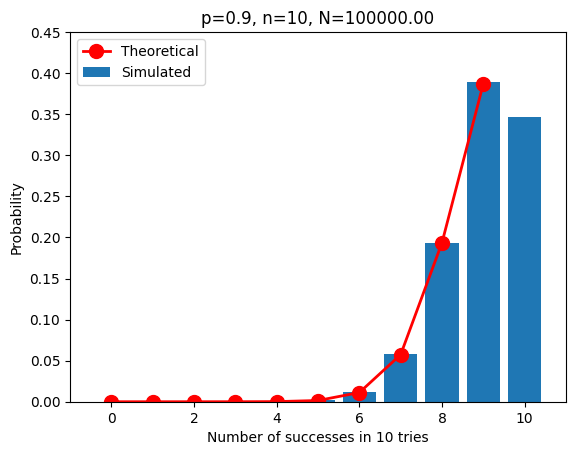

In [4]:
# Now let's make a fun animation showing different values of p and N. 
#   Note that, of course, the more picks you make of the random variable 
#   (higher N), the more closely the outcomes (the "samples") match the true 
#   distribution.
n=10
xs = range(0, n)
f = plt.figure()
for p in np.arange(0, 1, 0.1):
    for N in np.round(np.logspace(1,5,10)):

        # Get the true binomial pdf
        Y = binom.pmf(xs,n,p)

        # Get the random picks, make histogram and normalize
        counts = collections.Counter(binom.rvs(n,p,size=int(N)))
        normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

        # Show both
        plt.bar(normalized_counts.keys(), normalized_counts.values())
        plt.plot(xs, Y, 'ro-', linewidth=2, markersize=10)
        
        # Labels, etc
        plt.title(f'p={p:.1f}, n={n}, N={N:.2f}')
        plt.xlabel(f'Number of successes in {n} tries')
        plt.ylabel('Probability')
        plt.axis([-1, n+1, 0, 0.45])
        plt.legend(('Theoretical', 'Simulated'))
        plt.show()

        # Wait
        time.sleep(0.1)

        # Clear for next plot
        clear_output(wait=True)

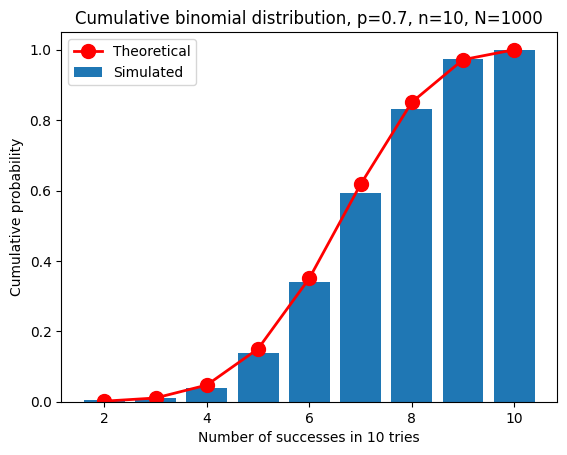

In [5]:
# The cumulative distribution function is just the proability of obtaining an 
#   outcome that is equal to OR LESS THAN a particular value.
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Make histogram
counts = collections.Counter(outcomes)

# Unzip keys from values in a sorted order
keys, values = zip(*sorted(counts.items(), key=itemgetter(0)))

# Compute the cumulative sum of the counts normalized by the total counts (so 
#   it is a probability function and not just a histogram -- note that the final 
#   value in the cdf should equal 1 because every value should be equal to or 
#   less than that value).
total = sum(values)
cumulative_ps = [x/total for x in np.cumsum(values)]

# Plot as a bar graph
plt.bar(keys, cumulative_ps)

# Compare it to the real binomial cumulative distribution, which we find 
#   using binom.cdf
Y = binom.cdf(keys,n,p)
plt.plot(keys, Y, 'ro-', linewidth=2, markersize=10)

# Labels, etc
plt.title(f'Cumulative binomial distribution, p={p:.1f}, n={n}, N={num_experiments}')
plt.xlabel(f'Number of successes in {n} tries')
plt.ylabel('Cumulative probability')
plt.legend(('Theoretical', 'Simulated'))

P(X = 0) = 0.1074
P(X = 1) = 0.2684
P(X = 2) = 0.3020
P(X = 3) = 0.2013
P(X = 4) = 0.0881
P(X = 5) = 0.0264
P(X = 6) = 0.0055
P(X = 7) = 0.0008
P(X = 8) = 0.0001
P(X = 9) = 0.0000
P(X = 10) = 0.0000


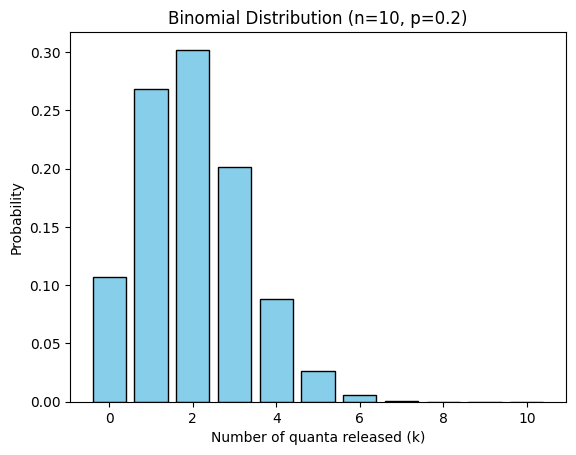

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 10   # number of quanta (trials)
p = 0.2  # probability of release (success per trial)

# Values of k (number of quanta released)
k_values = np.arange(0, n+1)

# Compute binomial probabilities
probs = binom.pmf(k_values, n, p)

# Print probabilities
for k, prob in zip(k_values, probs):
    print(f"P(X = {k}) = {prob:.4f}")

# Plot the probability distribution
plt.bar(k_values, probs, color="skyblue", edgecolor="black")
plt.xlabel("Number of quanta released (k)")
plt.ylabel("Probability")
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()

P(X=8 | n=14, p=0.1) = 0.0000159592
P(X=8 | n=14, p=0.7) = 0.1262022741

Likelihood at each decile p:
  p=0.1 -> L=0.0000159592
  p=0.2 -> L=0.0020152792
  p=0.3 -> L=0.0231800095
  p=0.4 -> L=0.0918211579
  p=0.5 -> L=0.1832885742
  p=0.6 -> L=0.2065976053
  p=0.7 -> L=0.1262022741
  p=0.8 -> L=0.0322444670
  p=0.9 -> L=0.0012926930
  p=1.0 -> L=0.0000000000

Most likely decile: p=0.6 (L=0.2065976053)

MLE: p_hat = 0.571429 with L(p_hat) = 0.2115388948


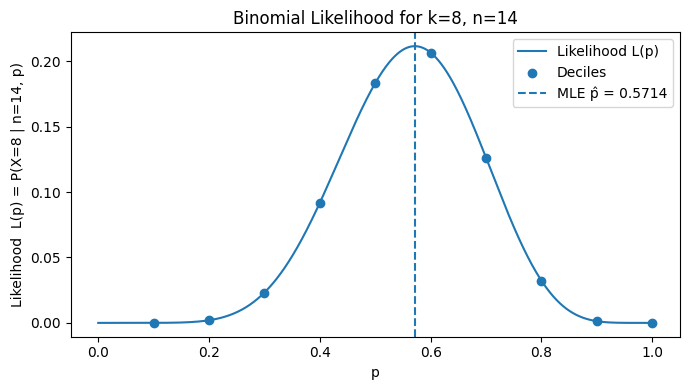

In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Observed data
n = 14
k = 8

# Binomial PMF (no SciPy needed)
def binom_pmf(n, k, p):
    return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

# 1) Specific hypotheses: p = 0.1 and p = 0.7
p1 = 0.1
p2 = 0.7
prob_p1 = binom_pmf(n, k, p1)
prob_p2 = binom_pmf(n, k, p2)

print(f"P(X=8 | n=14, p=0.1) = {prob_p1:.10f}")
print(f"P(X=8 | n=14, p=0.7) = {prob_p2:.10f}")

# 2) Likelihood at each decile
deciles = np.round(np.arange(0.1, 1.0 + 0.1, 0.1), 1)
lik_deciles = [(float(p), binom_pmf(n, k, float(p))) for p in deciles]

print("\nLikelihood at each decile p:")
for p, L in lik_deciles:
    print(f"  p={p:.1f} -> L={L:.10f}")

# Which decile maximizes the likelihood?
best_decile, best_L = max(lik_deciles, key=lambda t: t[1])
print(f"\nMost likely decile: p={best_decile:.1f} (L={best_L:.10f})")

# 3) Maximum-likelihood estimate (continuous p)
p_hat = k / n
L_hat = binom_pmf(n, k, p_hat)
print(f"\nMLE: p_hat = {p_hat:.6f} with L(p_hat) = {L_hat:.10f}")

# 4) Plot the likelihood curve and mark deciles + MLE
ps = np.linspace(0.0001, 0.9999, 1000)  # avoid 0 and 1 to keep numbers finite
Ls = [binom_pmf(n, k, p) for p in ps]

plt.figure(figsize=(7,4))
plt.plot(ps, Ls, label="Likelihood L(p)")
plt.scatter(deciles, [binom_pmf(n, k, p) for p in deciles], label="Deciles", zorder=3)
plt.axvline(p_hat, linestyle="--", label=f"MLE p̂ = {p_hat:.4f}")
plt.xlabel("p")
plt.ylabel("Likelihood  L(p) = P(X=8 | n=14, p)")
plt.title("Binomial Likelihood for k=8, n=14")
plt.legend()
plt.tight_layout()
plt.show()


=== Specific p = 0.1 ===
L(p=0.1) = 1.237818721500e-07
log L(p=0.1) = -15.904744915931

=== Likelihood at deciles ===
p= 0.0  ->  L=0.000000000000e+00   logL=-inf
p= 0.1  ->  L=1.237818721500e-07   logL=-15.904744915931492
p= 0.2  ->  L=1.732842750806e-04   logL=-8.660577103497953
p= 0.3  ->  L=4.550575422829e-03   logL=-5.392501587459659
p= 0.4  ->  L=1.897003133922e-02   logL=-3.96489484299538
p= 0.5  ->  L=2.239646762609e-02   logL=-3.7988520278199727
p= 0.6  ->  L=8.431125039654e-03   logL=-4.775825059211709
p= 0.7  ->  L=8.358199756217e-04   logL=-7.087097308234063
p= 0.8  ->  L=1.083026719254e-05   logL=-11.433165825737738
p= 0.9  ->  L=1.528171261111e-09   logL=-20.299194070603935
p= 1.0  ->  L=0.000000000000e+00   logL=-inf

Best decile: p=0.5 with L=2.239646762609e-02

Analytical MLE: p_hat = (k1+k2)/(2n) = 0.46428571
Refined-grid MLE (10001 pts): p ≈ 0.46430714 with L=2.405619759542e-02
L(p_hat) = 2.405619821701e-02    (should match the refined-grid result closely)


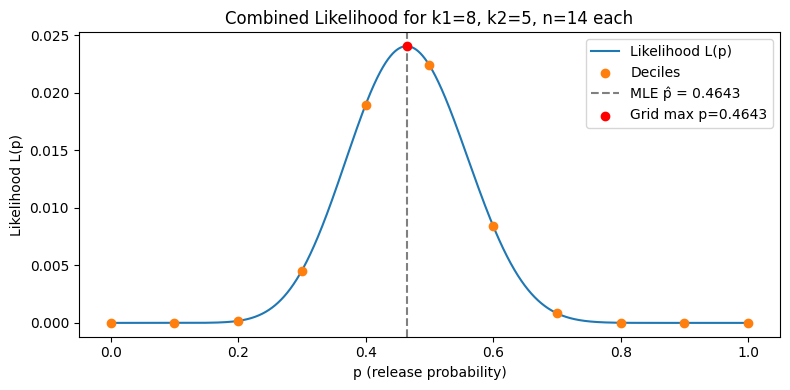


Total trials N = 28, p_hat = 0.464286, SE(p_hat) = 0.094250
 N= 28 -> SE = 0.094250
 N= 56 -> SE = 0.066645
 N=140 -> SE = 0.042150
 N=280 -> SE = 0.029804


In [31]:
# Combined-likelihood analysis for two independent binomial measurements
import numpy as np
import math
import matplotlib.pyplot as plt
from math import comb, log

# Data
n = 14
k1 = 8
k2 = 5

def binom_pmf(n,k,p):
    return comb(n,k) * (p**k) * ((1-p)**(n-k))

# 1) Likelihood and log-likelihood at p = 0.1
p_test = 0.1
L_p_test = binom_pmf(n, k1, p_test) * binom_pmf(n, k2, p_test)
logL_p_test = math.log(L_p_test) if L_p_test>0 else float('-inf')

print("=== Specific p = 0.1 ===")
print(f"L(p=0.1) = {L_p_test:.12e}")
print(f"log L(p=0.1) = {logL_p_test:.12f}\n")

# 2) Likelihood at deciles 0.0, 0.1, ..., 1.0
deciles = np.round(np.arange(0.0, 1.0+0.1, 0.1), 1)
decile_results = []
for p in deciles:
    if p==0.0 or p==1.0:
        L = 0.0
        logL = float('-inf')
    else:
        L = binom_pmf(n, k1, p) * binom_pmf(n, k2, p)
        logL = math.log(L)
    decile_results.append((p, L, logL))

print("=== Likelihood at deciles ===")
for p, L, logL in decile_results:
    print(f"p={p: .1f}  ->  L={L:.12e}   logL={logL if L>0 else '-inf'}")

# Which decile is best?
best_decile = max(decile_results, key=lambda t: t[1])
print(f"\nBest decile: p={best_decile[0]} with L={best_decile[1]:.12e}")

# 3) Analytical MLE (continuous) and refined grid search
p_hat = (k1 + k2) / (2*n)   # total successes / total trials
print(f"\nAnalytical MLE: p_hat = (k1+k2)/(2n) = {p_hat:.8f}")

# refine grid
ps = np.linspace(0.0001, 0.9999, 10001)
Ls = np.array([binom_pmf(n, k1, p) * binom_pmf(n, k2, p) for p in ps])
imax = Ls.argmax()
p_best = ps[imax]
L_best = Ls[imax]
print(f"Refined-grid MLE (10001 pts): p ≈ {p_best:.8f} with L={L_best:.12e}")

# Compare L at analytic p_hat
L_at_phat = binom_pmf(n, k1, p_hat) * binom_pmf(n, k2, p_hat)
print(f"L(p_hat) = {L_at_phat:.12e}    (should match the refined-grid result closely)")

# 4) Plot likelihood curve and mark deciles and MLE
plt.figure(figsize=(8,4))
plt.plot(ps, Ls, label='Likelihood L(p)')
plt.scatter(deciles, [r[1] for r in decile_results], color='C1', zorder=5, label='Deciles')
plt.axvline(p_hat, linestyle='--', color='gray', label=f'MLE p̂ = {p_hat:.4f}')
plt.scatter([p_best], [L_best], color='red', zorder=6, label=f'Grid max p={p_best:.4f}')
plt.xlabel('p (release probability)')
plt.ylabel('Likelihood L(p)')
plt.title('Combined Likelihood for k1=8, k2=5, n=14 each')
plt.legend()
plt.tight_layout()
plt.show()

# 5) How estimate improves with larger sample size: show standard error for p_hat
N_total = 2*n
se = math.sqrt(p_hat*(1-p_hat) / N_total)
print(f"\nTotal trials N = {N_total}, p_hat = {p_hat:.6f}, SE(p_hat) = {se:.6f}")
for N in [N_total, 2*N_total, 5*N_total, 10*N_total]:
    seN = math.sqrt(p_hat*(1-p_hat)/N)
    print(f" N={N:3d} -> SE = {seN:.6f}")


In [32]:
import numpy as np

# Data
counts = np.array([0,0,3,7,10,19,26,16,16,5,5,0,0,0,0])
k_values = np.arange(15)
n = 14
num_experiments = counts.sum()

# Total successes
total_successes = np.sum(k_values * counts)
total_trials = n * num_experiments

# MLE
p_hat = total_successes / total_trials
print(f"Maximum-likelihood estimate (p̂) = {p_hat:.4f}")


Maximum-likelihood estimate (p̂) = 0.4359


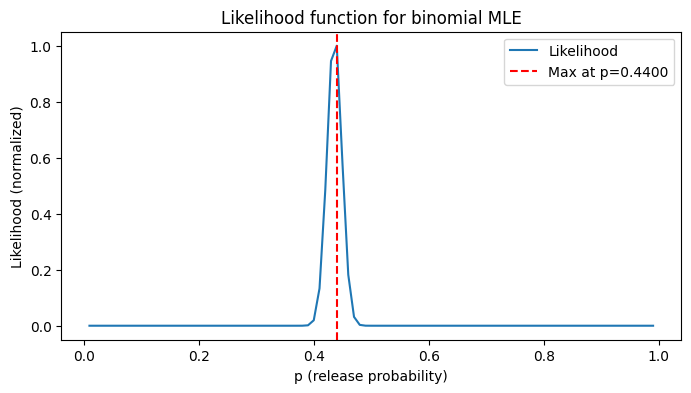

MLE from grid search: p̂ = 0.4400


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Data
counts = np.array([0,0,3,7,10,19,26,16,16,5,5,0,0,0,0])
k_values = np.arange(15)
n = 14
num_experiments = counts.sum()

# Total likelihood function (log-likelihood to avoid underflow)
def log_likelihood(p):
    if p <= 0 or p >= 1:
        return -np.inf  # avoid log(0)
    ll = 0
    for k, c in zip(k_values, counts):
        ll += c * (np.log(comb(n,k)) + k*np.log(p) + (n-k)*np.log(1-p))
    return ll

# Grid of p values
p_grid = np.arange(0.01, 1.0, 0.01)
logL_values = np.array([log_likelihood(p) for p in p_grid])
L_values = np.exp(logL_values - max(logL_values))  # normalize to avoid underflow

# Plot
plt.figure(figsize=(8,4))
plt.plot(p_grid, L_values, label='Likelihood')
plt.xlabel('p (release probability)')
plt.ylabel('Likelihood (normalized)')
plt.title('Likelihood function for binomial MLE')
plt.axvline(p_grid[np.argmax(L_values)], linestyle='--', color='red', label=f"Max at p={p_grid[np.argmax(L_values)]:.4f}")
plt.legend()
plt.show()

# Report MLE from grid
p_hat_grid = p_grid[np.argmax(L_values)]
print(f"MLE from grid search: p̂ = {p_hat_grid:.4f}")


In [37]:
from math import comb

# Parameters
n = 14
k = 7
p_null = 0.3

# Binomial probability
P_k_given_null = comb(n, k) * (p_null**k) * ((1-p_null)**(n-k))
print(f"P(X=7 | n=14, p=0.3) = {P_k_given_null:.6f}")

P(X=7 | n=14, p=0.3) = 0.061813


In [38]:
import scipy.stats as st

# One-sided p-value (probability of observing k >= 7)
p_value_one_sided = st.binom.sf(k-1, n, p_null)  # sf = 1 - cdf(k-1)
print(f"One-sided p-value (k >= 7) = {p_value_one_sided:.4f}")

# Two-sided p-value (extreme in both tails)
p_value_two_sided = 2 * min(st.binom.cdf(k, n, p_null), st.binom.sf(k-1, n, p_null))
print(f"Two-sided p-value = {p_value_two_sided:.4f}")


One-sided p-value (k >= 7) = 0.0933
Two-sided p-value = 0.1866


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import binom
from scipy.stats import expon

number of events expected=1000, actual=1051


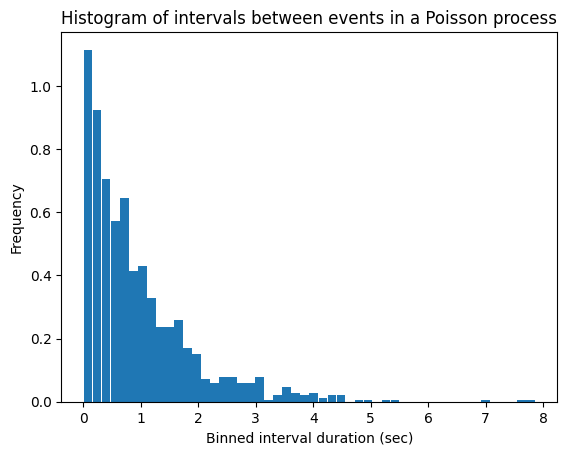

In [12]:
# Let's go back to simulating a Poisson process as the limit of a sequence of 
# Bernoulli trials as the interval size->0. 
delta_t = 1000          # Assume the whole process takes this long
plambda = 1             # Rate (events per sec)
num_bins_per_second = 100    # Number of bins in which to check for events
total_bins = round(num_bins_per_second*delta_t)

# First convert lambda (overall rate) to probability/bin, using deltaT 
#   events/time divided by bins/time = events/bin
p = plambda * delta_t / total_bins

# Now simulate checking one "outcome" per bin, using the given probability/bin
outcomes = binom.rvs(1, p, size=total_bins)

# Check that the nubmer of events is what we expect
print(f'number of events expected={plambda*delta_t}, actual={np.sum(outcomes==1)}')

# Now for the next part -- instead of looking at the counts per interval, 
#   which is what the Poisson distribution described, we are now going to look 
#   at the same data but are considering the intervals between events. As you 
#   will see below, these intervals are distributed as an exponential.
# First look at the histogram of intervals between events
# Get intervals
intervals_between_events = np.diff(np.where(outcomes==1))

# Convert to seconds
intervals_between_events_sec = intervals_between_events/num_bins_per_second

# Make and show the normalized histogram. Here the interval is a continuous 
#   variable (the x-axis is binned in the histogram to visualize it, but the 
#   actual values can take on any continuous value because they represent the 
#   amount of time since the previous event), so to normalize the histogram to 
#   make a pdf we can't just sum the values -- we have to sum the values 
#   multiplied by the bin width (i.e., take the integral). We use numpy's 
#   "trapz" which treats each bin as a trapezoid (because the heights before 
#   and after can be slightly different) to compute the integral:
counts, edges = np.histogram(intervals_between_events_sec, bins=50)
plt.bar(edges[:-1], np.divide(counts, np.trapezoid(counts, edges[:-1])), width=0.15, align='edge')
plt.title('Histogram of intervals between events in a Poisson process')
plt.xlabel('Binned interval duration (sec)')
plt.ylabel('Frequency')

# Compare to an exponential distribution (see below), in red, with the rate 
#   parameter lambda equal to 1/lambda
# plt.plot(edges[:-1], expon.pdf(edges[:-1], scale=1/plambda), 'r-', linewidth=2)
plt.show()

In [14]:
import numpy as np
from scipy.stats import binom
from scipy.stats import poisson
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

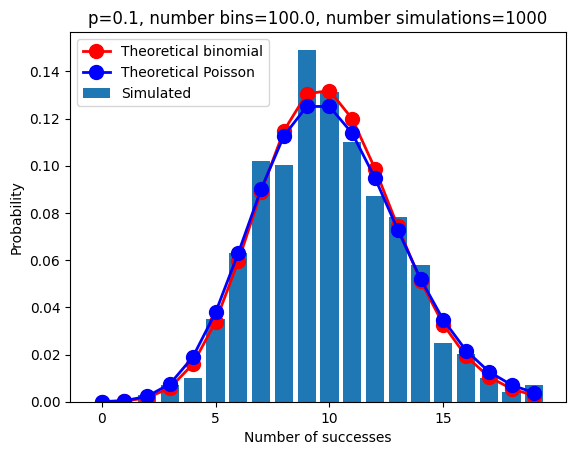

In [15]:
# Make an animation comparing binomial and Poisson distributions

# The Poisson process is defined by a rate, lambda, of events/sec 
#   (call it plambda to avoid Python lambda)
plambda = 1

# We will consider events generated in a given fixed interval, in seconds.
delta_t = 10

# Define an axis for computing and plotting a histogram of counts
max_successes = 20
bins = np.arange(-0.5, max_successes+0.5, 1)
xaxis = (bins[1:] + bins[:-1])/2

# Number of simulations
num_simulations = 1000

# Loop through different numbers of time bins used to divide up the given 
#   interval. Remember this is how we will show the transition from a binomial 
#   to a Poisson pdf describing the number of events in the interval: as the 
#   number of bins gets larger, the simulation gets closer to considering 
#   events occurring at any time and thus the distribution gets closer to Poisson
f = plt.figure()
for n in np.round(np.linspace(1, 100, max_successes)):
   
   # Check for events in each bin    
   #    Scale p so that it is probability of events/bin, not events/sec -- 
   #    which can be at most =1.
   p = np.minimum(plambda * delta_t/n, 1)

   # Simulate outcomes as the number of events that occurred in the n bins 
   #    ("tries"), given p and done N times.
   outcomes = binom.rvs(int(n), p, size=num_simulations)

   # Make a histogram of the outcomes, using the array of counts ("xaxis") 
   #    we defined above.
   counts, edges = np.histogram(outcomes, bins)

   # Show a normalized version that is a pdf. Here counts (the x-axis of the 
   #    histogram) is a DISCRETE variable, so we just have to add up the values
   plt.bar(xaxis, counts/counts.sum())

   # Plot the theoretical binomial pdf, for the values in xaxis and given n and p.
   binoY = binom.pmf(xaxis, n, p)

   # Show in RED
   plt.plot(xaxis, binoY, 'ro-', linewidth=2, markersize=10)

   # Get the equivalent Poisson pdf using the rate computed for the full 
   #    interval: lambda * deltaT
   poissY = poisson.pmf(xaxis, plambda*delta_t)

   # Show in BLUE
   plt.plot(xaxis, poissY, 'bo-', linewidth=2, markersize=10)

   # Labels, etc
   # plt.axis([xaxis([0]), xaxis([-1]), 0, np.maximum(poissY)+0.1])
   plt.title(f'p={p:.1f}, number bins={n}, number simulations={num_simulations}')
   plt.xlabel('Number of successes')
   plt.xticks(np.arange(0, max_successes, 5))
   plt.ylabel('Probability')
   plt.legend(['Theoretical binomial', 'Theoretical Poisson', 'Simulated'], loc='upper left')
   plt.show()

   # Wait
   time.sleep(0.5)

   # Clear for next plot
   clear_output(wait=True)

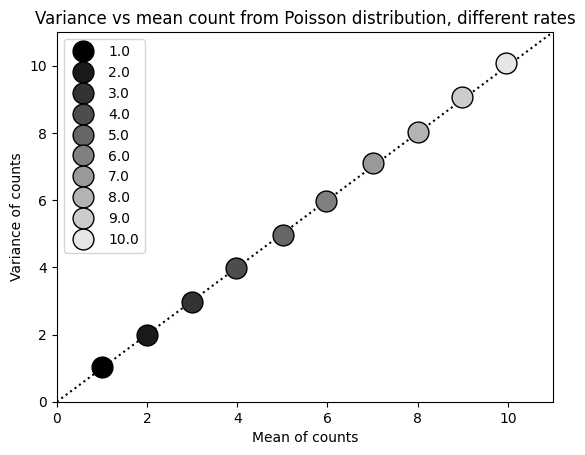

In [16]:
# An interesting property of a Poisson distributon is that var = mean. 
#   Let's try it using simulations!

# Set up simulations using various values of lambda
num_lambdas = 10
lambdas = np.linspace(1,10,num_lambdas)
N = 10000 # number of simulations per condition

# Set up plot
f = plt.figure()
plt.axis([0, np.amax(lambdas)+1, 0, np.amax(lambdas)+1])
plt.plot([0, np.amax(lambdas)+1], [0, np.amax(lambdas)+1], 'k:')

# Show labels
plt.xlabel('Mean of counts')
plt.ylabel('Variance of counts')
plt.title('Variance vs mean count from Poisson distribution, different rates')

# Save plot objects to make legend

# cycle through different values of lambda
for idx, val in enumerate(lambdas):
   
   # Get the counts
   counts = poisson.rvs(val, size=N)
   
   # Plot var vs mean, with grayscale to indicate lambda
   plt.plot(np.mean(counts), np.var(counts), 'ko', markersize=15, \
            markerfacecolor=str(idx/num_lambdas), label=str(val))

# Show legend for grayscale values = different rates (lambdas)
# strs = cellstr(num2str(lambdas'));
plt.legend()

number of events expected=1000, actual=1012


/var/folders/_7/1g0wns492314pw1m6p9lpk1w0000gp/T/ipykernel_56366/3704198772.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  plt.bar(edges[:-1], np.divide(counts, np.trapz(counts, edges[:-1])), width=0.15, align='edge')


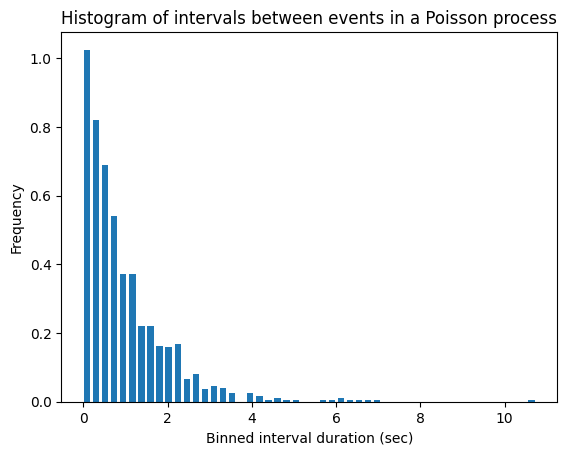

In [17]:
# Let's go back to simulating a Poisson process as the limit of a sequence of Bernoulli trials as the interval size->0. 
delta_t = 1000          # Assume the whole process takes this long
plambda = 1             # Rate (events per sec)
num_bins_per_second = 100    # Number of bins in which to check for events
total_bins = round(num_bins_per_second*delta_t)

# First convert lambda (overall rate) to probability/bin, using deltaT events/time divided by bins/time = events/bin
p = plambda * delta_t / total_bins

# Now simulate checking one "outcome" per bin, using the given probability/bin
outcomes = binom.rvs(1, p, size=total_bins)

# Check that the nubmer of events is what we expect
print(f'number of events expected={plambda*delta_t}, actual={np.sum(outcomes==1)}')

# Now for the next part -- instead of looking at the counts per interval, which is what the Poisson distribution described, we are now going to look at the same data but are considering the intervals between events. As you will see below, these intervals are distributed as an exponential.
# First look at the histogram of intervals between events
# Get intervals
intervals_between_events = np.diff(np.where(outcomes==1))

# Convert to seconds
intervals_between_events_sec = intervals_between_events/num_bins_per_second

# Make and show the normalized histogram. Here the interval is a continuous variable (the x-axis is binned in the histogram to visualize it, but the actual values can take on any continuous value because they represent the amount of time since the previous event), so to normalize the histogram to make a pdf we can't just sum the values -- we have to sum the values multiplied by the bin width (i.e., take the integral). We use numpy's "trapz" which treats each bin as a trapezoid (because the heights before and after can be slightly different) to compute the integral:
counts, edges = np.histogram(intervals_between_events_sec, bins=50)
plt.bar(edges[:-1], np.divide(counts, np.trapz(counts, edges[:-1])), width=0.15, align='edge')
plt.title('Histogram of intervals between events in a Poisson process')
plt.xlabel('Binned interval duration (sec)')
plt.ylabel('Frequency')

# Compare to an exponential distribution (see below), in red, with the rate parameter lambda equal to 1/lambda
# plt.plot(edges[:-1], expon.pdf(edges[:-1], scale=1/plambda), 'r-', linewidth=2)
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [19]:
# Parameters
rate = 5  # mean firing rate in Hz (spikes per second)
duration = 100  # total time to simulate (seconds)

In [20]:
# Generate interspike intervals
intervals = np.random.exponential(scale=1/rate, size=int(rate*duration*1.5))  # overshoot to ensure enough spikes

# Compute spike times by cumulative sum
spike_times = np.cumsum(intervals)

# Keep only spikes within the simulation duration
spike_times = spike_times[spike_times < duration]

print(f"Number of spikes: {len(spike_times)}")


Number of spikes: 523


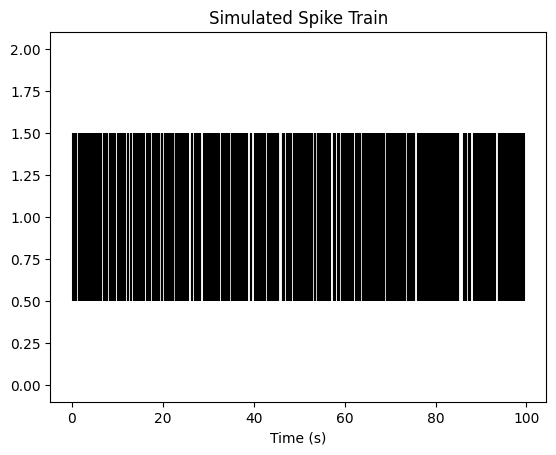

In [21]:
plt.eventplot(spike_times, colors='black')
plt.xlabel('Time (s)')
plt.title('Simulated Spike Train')
plt.show()

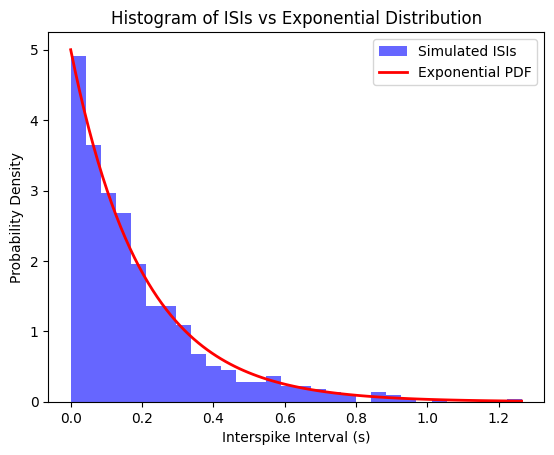

In [22]:
# Compute ISIs
ISIs = np.diff(spike_times)

# Plot histogram
plt.hist(ISIs, bins=30, density=True, alpha=0.6, color='blue', label='Simulated ISIs')

# Overlay exponential PDF for comparison
x = np.linspace(0, max(ISIs), 100)
plt.plot(x, expon.pdf(x, scale=1/rate), 'r-', lw=2, label='Exponential PDF')
plt.xlabel('Interspike Interval (s)')
plt.ylabel('Probability Density')
plt.title('Histogram of ISIs vs Exponential Distribution')
plt.legend()
plt.show()
